In [29]:
!pip install yfinance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from seaborn import regression
sns.set()
plt.style.use('seaborn-whitegrid')

data = pd.read_csv("USD GBP Currency.csv")
print(data.head())

         Date     Open     High      Low    Close  Adj Close  Volume
0  2021-09-30  0.74481  0.74530  0.73980  0.74480    0.74480       0
1  2021-10-01  0.74241  0.74425  0.73673  0.74240    0.74240       0
2  2021-10-04  0.73687  0.73890  0.73315  0.73687    0.73687       0
3  2021-10-05  0.73488  0.73606  0.73260  0.73489    0.73489       0
4  2021-10-06  0.73391  0.73830  0.73360  0.73380    0.73380       0


In [30]:
# Set the ticker as 'GBPUSD=X'
forex_data = yf.download('GBPUSD=X', start='2021-09-30', end='2022-09-30')

# Set the index to a datetime object
forex_data.index = pd.to_datetime(forex_data.index)

# Display the last five rows
forex_data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-23,1.126304,1.127345,1.089859,1.126418,1.126418,0
2022-09-26,1.079914,1.091560,1.037904,1.079739,1.079739,0
2022-09-27,1.077006,1.083541,1.073849,1.077284,1.077284,0
2022-09-28,1.072846,1.083964,1.054163,1.072754,1.072754,0
2022-09-29,1.083459,1.106562,1.076449,1.083600,1.083600,0


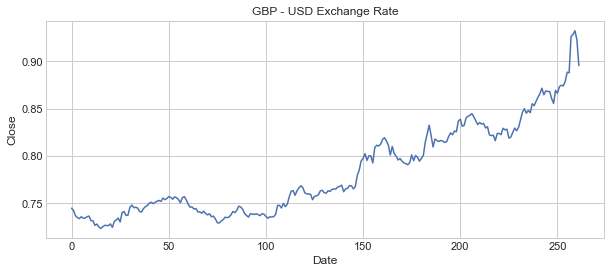

In [31]:
plt.figure(figsize=(10, 4))
plt.title("GBP - USD Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data["Close"])
plt.show()

In [32]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [33]:
data = data.dropna()

               Open      High       Low     Close  Adj Close  Volume
Open       1.000000  0.997150  0.998764  0.999983   0.999983     NaN
High       0.997150  1.000000  0.997231  0.997166   0.997166     NaN
Low        0.998764  0.997231  1.000000  0.998774   0.998774     NaN
Close      0.999983  0.997166  0.998774  1.000000   1.000000     NaN
Adj Close  0.999983  0.997166  0.998774  1.000000   1.000000     NaN
Volume          NaN       NaN       NaN       NaN        NaN     NaN


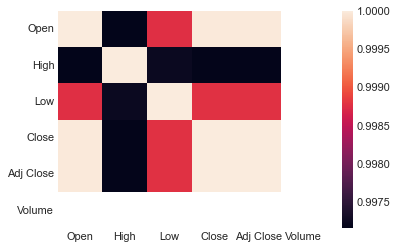

In [34]:
print(data.corr())
sns.heatmap(data.corr())
plt.show()

In [35]:
x = data[["Open", "High", "Low"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

In [36]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

In [37]:
data = pd.DataFrame(data={"Predicted Rate": ypred.flatten()})
print(data.head())

   Predicted Rate
0        0.857650
1        0.821870
2        0.819930
3        0.794960
4        0.740807
